<a href="https://colab.research.google.com/github/kayodeolusanya/Jumia-Online-Shoppers-Intention/blob/main/Jumia_Online_Shoppers_Intention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Administrative: This is the number of pages of this type (administrative) that the user visited.

Administrative_Duration: This is the amount of time spent in this category of pages.

Informational: This is the number of pages of this type (informational) that the user visited.

Informational_Duration: This is the amount of time spent in this category of pages.

ProductRelated: This is the number of pages of this type (product related) that the user visited.

ProductRelated_Duration: This is the amount of time spent in this category of pages.

BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

ExitRates: The percentage of pageviews on the website that end at that specific page.

PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction

SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.

Month: Contains the month the pageview occurred, in string form.

OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

Browser: An integer value representing the browser that the user was using to view the page.

Region: An integer value representing which region the user is located in.

TrafficType: An integer value representing what type of traffic the user is categorized into.

VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

Weekend: A boolean representing whether the session is on a weekend.

Revenue: A boolean representing whether or not the user completed the purchase.


In [2]:
# To read the dataset
raw_data = pd.read_csv('/content/online_shoppers_intention.csv')


In [3]:
# Assisgning another variable df to raw data
df = raw_data

In [4]:
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
print(df['Weekend'].value_counts())

False    9462
True     2868
Name: Weekend, dtype: int64


In [6]:
# To check for missing values
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
# To view the shape of the dataset
df.shape

(12330, 18)

In [8]:
# To view the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [9]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [10]:
df.describe(include=['object','bool'])

,Month,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330
unique,10,3,2,2
top,May,Returning_Visitor,False,False
freq,3364,10551,9462,10422


## Data Pre-Processing

In [11]:
# Coverting Numerical Data type to Categorical
df['OperatingSystems'] = df['OperatingSystems'].astype('str')
df['Browser'] = df['Browser'].astype('str')
df['Region'] = df['Region'].astype('str')
df['TrafficType'] = df['TrafficType'].astype('str')
df['VisitorType'] = df['VisitorType'].astype('str')
df['Weekend'] = df['Weekend'].astype('str')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  object 
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

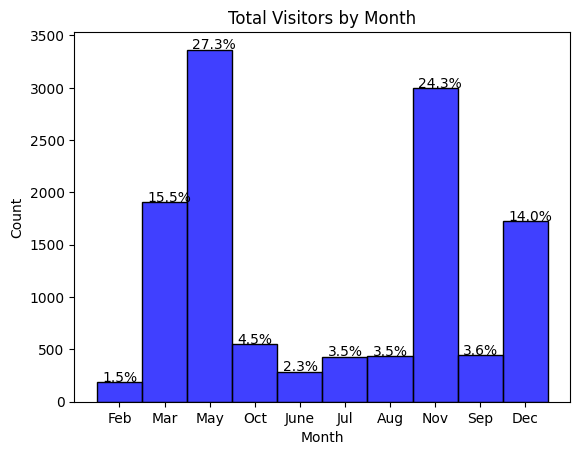

In [53]:
# Visualizing the distribution of the categorical data

ax = sns.histplot(df['Month'], color = 'blue',ec='red')
plt.title('Total Visitors by Month')

# Adding data labels to the bars
total = float(len(df['Month']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 6 - 0.05
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y))

plt.show();

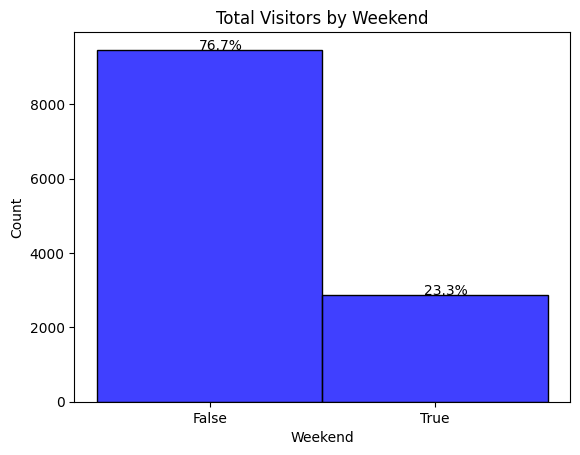

In [51]:
ax = sns.histplot(df['Weekend'], color = 'blue',ec='red')
plt.title('Total Visitors by Weekend')

# Adding data labels to the bars
total = float(len(df['Weekend']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y))

plt.show()

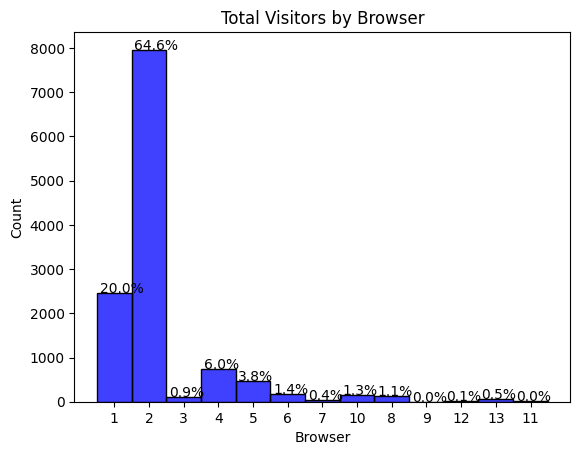

In [57]:
ax = sns.histplot(df['Browser'], color = 'blue',ec='red')
plt.title('Total Visitors by Browser')

# Adding data labels to the bars
total = float(len(df['Browser']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 8 - 0.05
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y))

plt.show()

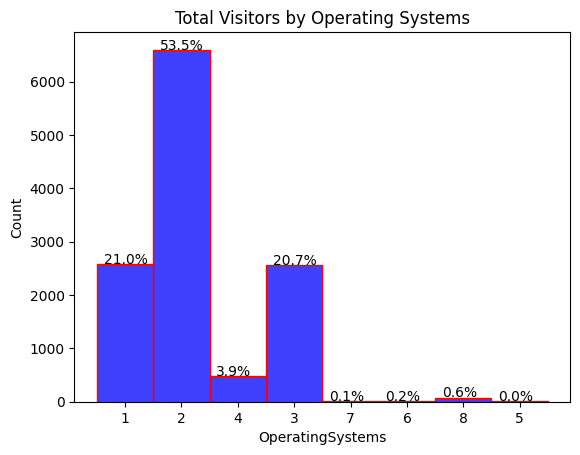

In [62]:
ax = sns.histplot(df['OperatingSystems'], color = 'blue',ec='red')
plt.title('Total Visitors by Operating Systems')

# Adding data labels to the bars
total = float(len(df['OperatingSystems']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 6 - 0.05
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y))

plt.show()

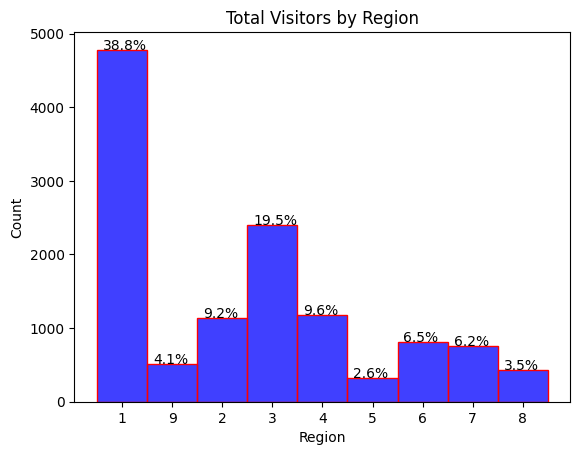

In [63]:
ax = sns.histplot(df['Region'], color = 'blue',ec='red')
plt.title('Total Visitors by Region')

# Adding data labels to the bars
total = float(len(df['Region']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 6 - 0.05
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y))


plt.show()

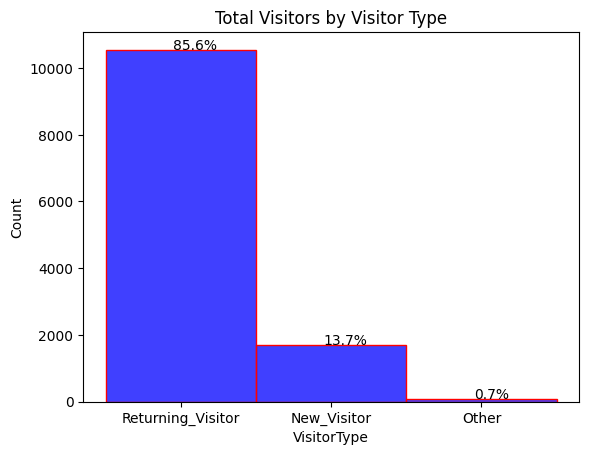

In [66]:
ax = sns.histplot(df['VisitorType'], color='blue',ec='red')
plt.title('Total Visitors by Visitor Type')

# Adding data labels to the bars
total = float(len(df['VisitorType']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y))

plt.show()

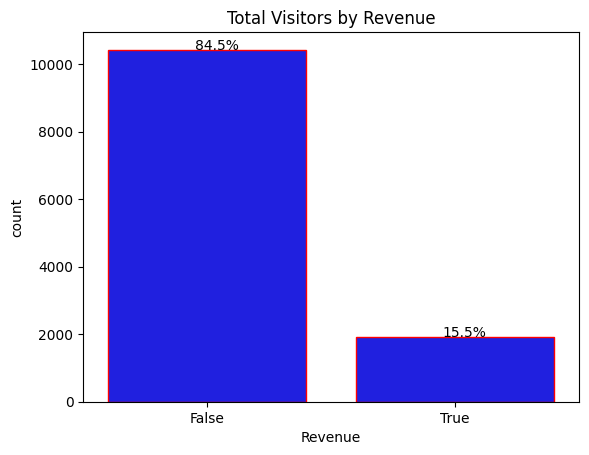

In [68]:
ax = sns.countplot(x='Revenue',data= df,color='blue',ec='red')
plt.title('Total Visitors by Revenue')

# Adding data labels to the bars
total = float(len(df['Revenue']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y))

plt.show()

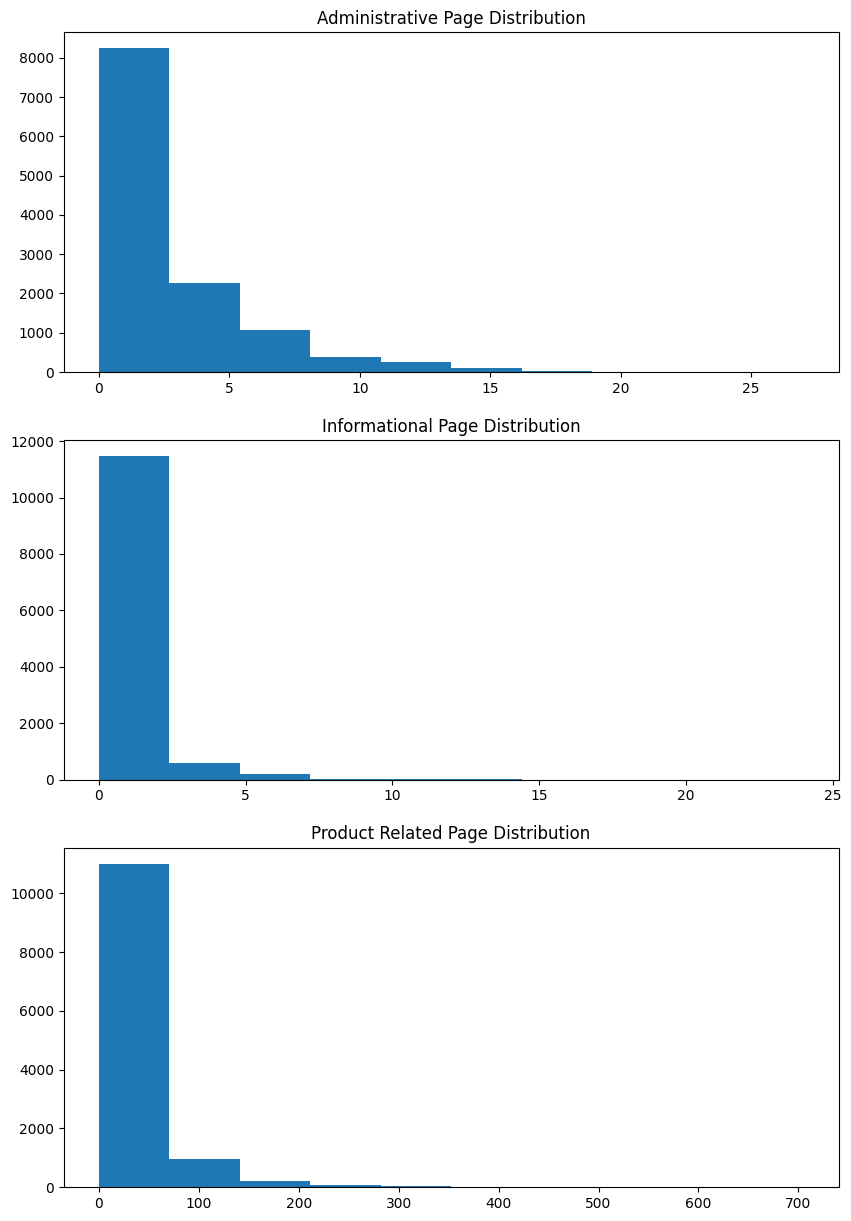

In [69]:
fig, axs = plt.subplots(3, 1, figsize = (10,15))
axs[0].hist(df["Administrative"])
axs[0].set_title("Administrative Page Distribution")

axs[1].hist(df["Informational"])
axs[1].set_title("Informational Page Distribution")

axs[2].hist(df["ProductRelated"])
axs[2].set_title("Product Related Page Distribution")

plt.show()